In [121]:
import pandas as pd
import numpy as np 

# matplotlib and seaborn used for plotting graphs
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import matplotlib.dates as mdates
from matplotlib.dates import YearLocator, MonthLocator, DateFormatter


In [123]:
# Import Gold data in panda and passed to a variable name "Data"
df = pd.read_csv("C:/Users/Sarit/Gold.csv")
# Preview the first 5 lines of the loaded data 
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,12/1/2007,NaN,NaN,NaN,NaN,NaN,NaN
1,1/1/2008,42.950001,54.000000,42.930000,51.439999,44.833244,329188800.0
2,2/1/2008,52.000000,53.520000,47.180000,51.950001,45.277744,195997700.0
3,3/1/2008,52.779999,54.740002,41.540001,43.450001,37.869438,205564100.0
4,4/1/2008,42.150002,46.259998,37.279999,38.619999,33.659809,192899800.0


In [124]:
type(df.Date[0])

str

In [125]:
df = pd.read_csv("C:/Users/Sarit/GoldNew.csv", parse_dates = ["Date"])

In [126]:
type(df.Date[0])

pandas._libs.tslibs.timestamps.Timestamp

In [129]:
df = pd.read_csv("C:/Users/Sarit/GoldNew.csv", parse_dates = ["Date"], index_col = "Date")
df.head()

,Close
Date,
2008-01-01,51.439999
2008-02-01,51.950001
2008-03-01,43.450001
2008-04-01,38.619999
2008-05-01,40.290001


In [198]:
DF= df.rename(columns={"Date": "Month", "Close": "Price"})

In [199]:
DF.head()

,Price
Date,
2008-01-01,51.439999
2008-02-01,51.950001
2008-03-01,43.450001
2008-04-01,38.619999
2008-05-01,40.290001


In [200]:
DF.index

DatetimeIndex(['2008-01-01', '2008-02-01', '2008-03-01', '2008-04-01',
               '2008-05-01', '2008-06-01', '2008-07-01', '2008-08-01',
               '2008-09-01', '2008-10-01',
               ...
               '2018-09-01', '2018-10-01', '2018-11-01', '2018-12-01',
               '2019-01-01', '2019-02-01', '2019-03-01', '2019-04-01',
               '2019-05-01', '2019-05-24'],
              dtype='datetime64[ns]', name='Date', length=138, freq=None)

Text(0, 0.5, 'Gold closing price')

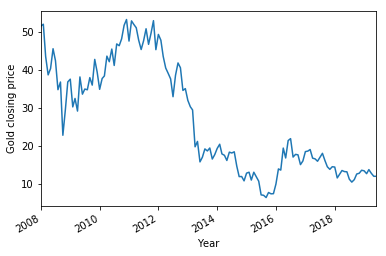

In [202]:
DF.Price.plot() # plot actual data
plt.xlabel ("Year")
plt.ylabel("Gold closing price")

Text(0, 0.5, 'Gold closing price')

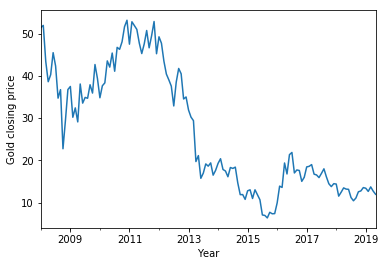

In [203]:
DF.Price.resample('M').mean().plot() # plot monthy data
plt.xlabel ("Year")
plt.ylabel("Gold closing price")

Text(0, 0.5, 'Gold closing price')

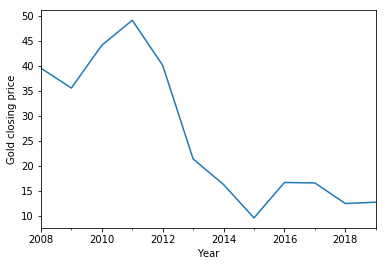

In [204]:
DF.Price.resample('Y').mean().plot() # plot yearly data
plt.xlabel ("Year")
plt.ylabel("Gold closing price")

In [205]:
# We split the time series into two contiguous sequences. 
# Calculate the mean and variance of each group of numbers and compare the values.
X = DF.values
split = len(X) // 2
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=39.156667, mean2=14.326812
variance1=88.138543, variance2=13.129937


Text(0.5, 1.0, 'Histogram of monthly gold prices from 2008-2019')

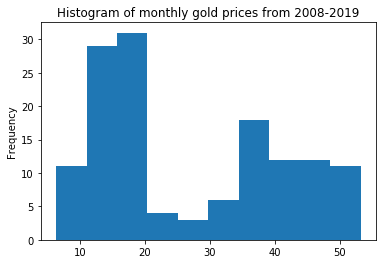

In [206]:
# check if assuming a Gaussian distribution makes sense in this case by plotting 
# the values of the time series as a histogram.
DF.Price.resample('M').mean().plot.hist() # plot monthy data
plt.title("Histogram of monthly gold prices from 2008-2019")

Text(0.5, 1.0, 'Histogram of yearly gold prices from 2008-2019')

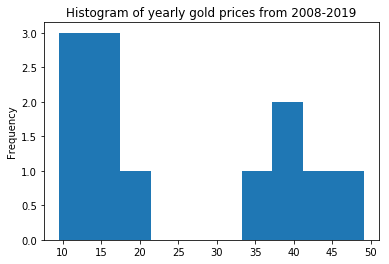

In [207]:
DF.Price.resample('Y').mean().plot.hist() # plot yearly data
plt.title("Histogram of yearly gold prices from 2008-2019")

In [67]:
# Running the example shows that indeed the distribution of values does not look like a Gaussian, 
# therefore the mean and variance values are less meaningful.
# This squashed distribution of the observations may be another indicator of a non-stationary time series.

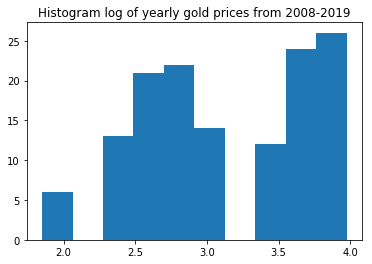

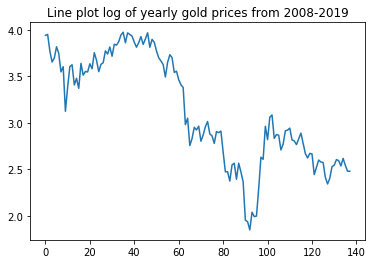

In [208]:
from numpy import log
X = DF.values
X = log(X)
plt.hist(X)
plt.title("Histogram log of yearly gold prices from 2008-2019")
plt.show()
plt.plot(X)
plt.title("Line plot log of yearly gold prices from 2008-2019")
plt.show()

In [209]:
# mean and standard deviation of the values of the log transformed dataset.
X = DF.values
X = log(X)
split = len(X) // 2
X1, X2 = X[0:split], X[split:]
mean1, mean2 = X1.mean(), X2.mean()
var1, var2 = X1.var(), X2.var()
print('mean1=%f, mean2=%f' % (mean1, mean2))
print('variance1=%f, variance2=%f' % (var1, var2))

mean1=3.632031, mean2=2.625810
variance1=0.080325, variance2=0.078634


In [72]:
# Running the examples shows mean and standard deviation values for each group that looks similar, but not identical.
# Perhaps, from these numbers alone, we would say the time series is stationary, 
# but we strongly believe this to not be the case from reviewing the line plot.

In [210]:
# Rolling statistics
rolmean = DF.rolling(window = 12).std()
rolSTD = DF.rolling(window = 12).std()
print(rolmean, rolSTD)

               Price
Date                
2008-01-01       NaN
2008-02-01       NaN
2008-03-01       NaN
2008-04-01       NaN
2008-05-01       NaN
2008-06-01       NaN
2008-07-01       NaN
2008-08-01       NaN
2008-09-01       NaN
2008-10-01       NaN
2008-11-01       NaN
2008-12-01  8.411097
2009-01-01  7.529124
2009-02-01  6.503192
2009-03-01  6.208770
2009-04-01  6.394520
2009-05-01  6.252781
2009-06-01  5.232930
2009-07-01  4.495001
2009-08-01  4.493969
2009-09-01  4.592826
2009-10-01  3.274891
2009-11-01  3.726806
2009-12-01  3.892197
2010-01-01  3.845903
2010-02-01  3.535992
2010-03-01  3.412979
2010-04-01  3.132859
2010-05-01  3.388075
2010-06-01  3.700637
...              ...
2017-01-01  2.623900
2017-02-01  2.395918
2017-03-01  2.013836
2017-04-01  2.021944
2017-05-01  2.035733
2017-06-01  1.811188
2017-07-01  1.193849
2017-08-01  1.219079
2017-09-01  1.246277
2017-10-01  1.440195
2017-11-01  1.613685
2017-12-01  1.729509
2018-01-01  1.728086
2018-02-01  2.031925
2018-03-01  1

Text(0.5, 1.0, 'Rolling Mean & Standard Deviation of Gold Prices')

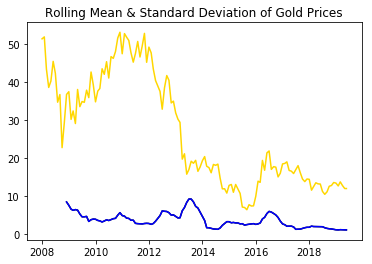

In [231]:
# plot rolling statistic
orig = plt.plot(DF, color = "gold", label = 'Original')
mean = plt.plot(rolmean, color = 'black', label = 'Rolling Mean')
std = plt.plot(rolSTD, color = 'blue', label = 'Rolling Std')
plt.title("Rolling Mean & Standard Deviation of Gold Prices")

In [177]:
# perform ADF test

In [214]:
print("Results of Dickey-Fuller Test:")
adftest = adfuller(DF['Price'], autolag = 'AIC')

adfoutput = pd.Series(adftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
for key,value in adftest[4].items():
    adfoutput['Critical Value (%s)' %key] = value
    print(adfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -1.593745
p-value                          0.486735
#Lags Used                       1.000000
Number of Observations Used    136.000000
Critical Value (1%)             -3.479372
dtype: float64
Test Statistic                  -1.593745
p-value                          0.486735
#Lags Used                       1.000000
Number of Observations Used    136.000000
Critical Value (1%)             -3.479372
Critical Value (5%)             -2.883037
dtype: float64
Test Statistic                  -1.593745
p-value                          0.486735
#Lags Used                       1.000000
Number of Observations Used    136.000000
Critical Value (1%)             -3.479372
Critical Value (5%)             -2.883037
Critical Value (10%)            -2.578234
dtype: float64


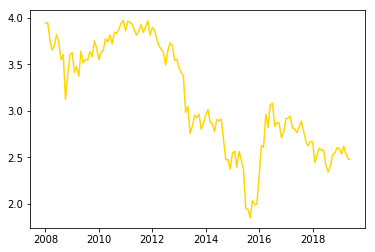

In [225]:
DF_logScale = np.log(DF)
plt.plot(DF_logScale, color = 'gold')

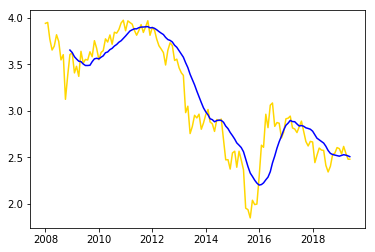

In [227]:
movingAverage = DF_logScale.rolling(window=12). mean()
movingSTD = DF_logscale.rolling(window=12). std()
plt.plot(DF_logScale, color = 'gold', label = "Log Data of Price")
plt.plot(movingAverage, color = 'blue', label = "Moving Average")
plt.title
         

In [234]:
datasetlogScaleMinusMovingAverage = DF_logScale - movingAverage
datasetlogScaleMinusMovingAverage.head(12)

,Price
Date,
2008-01-01,NaN
2008-02-01,NaN
2008-03-01,NaN
2008-04-01,NaN
2008-05-01,NaN
2008-06-01,NaN
2008-07-01,NaN
2008-08-01,NaN
2008-09-01,NaN


In [235]:
# remove NaN values
datasetlogScaleMinusMovingAverage.dropna(inplace = True)
datasetlogScaleMinusMovingAverage.head(10)

,Price
Date,
2008-12-01,-0.048582
2009-01-01,-0.002828
2009-02-01,-0.173857
2009-03-01,-0.078521
2009-04-01,-0.162972
2009-05-01,0.110680
2009-06-01,0.009417
2009-07-01,0.064991
2009-08-01,0.059316


In [232]:
def test_stationarity(timeseries):
    
    #determining rolling statistics
    movingAverage = timeseries.rolling(window=12).mean()
    movingSTD = timeseries.rolling(window=12).std()
    
    # plot rolling statistic
    orig = plt.plot(timeseries, color = "gold", label = 'Original')
    mean = plt.plot(movingAverage, color = 'blue', label = 'Rolling Mean')
    std = plt.plot(movingSTD, color = 'black', label = 'Rolling Std')
    plt.title("Rolling Mean & Standard Deviation of Gold Prices")
    
    #perform Dickey-Fuller test
    print("Results of Dickey-Fuller Test:")
    adftest = adfuller(timeseries['Price'], autolag = 'AIC')
    adfoutput = pd.Series(adftest[0:4], index = ['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for key,value in adftest[4].items():
        adfoutput['Critical Value (%s)' %key] = value
    print(adfoutput)

Results of Dickey-Fuller Test:
Test Statistic                  -3.380457
p-value                          0.011643
#Lags Used                       2.000000
Number of Observations Used    124.000000
Critical Value (1%)             -3.484220
Critical Value (5%)             -2.885145
Critical Value (10%)            -2.579359
dtype: float64


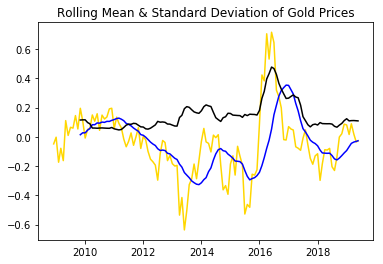

In [236]:
test_stationarity(datasetlogScaleMinusMovingAverage)

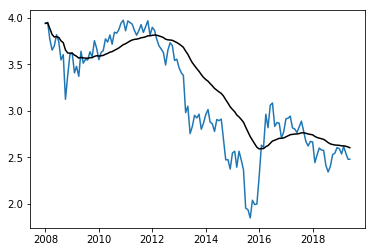

In [315]:
exponentialDecayweightedAverage = DF_logScale.ewm(halflife=12, min_periods = 0, adjust = True). mean()
plt.plot(DF_logScale)
plt.plot(exponentialDecayweightedAverage, color = 'black')                                                  

Results of Dickey-Fuller Test:
Test Statistic                  -2.445547
p-value                          0.129292
#Lags Used                       2.000000
Number of Observations Used    135.000000
Critical Value (1%)             -3.479743
Critical Value (5%)             -2.883198
Critical Value (10%)            -2.578320
dtype: float64


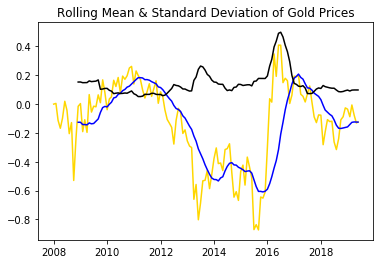

In [246]:
datasetlogScaleMinusMovingExponentialDecayAverage = DF_logscale - exponentialDecayweightedAverage
test_stationarity(datasetlogScaleMinusMovingExponentialDecayAverage)

Text(0.5, 1.0, 'Shifted logscale values to time series')

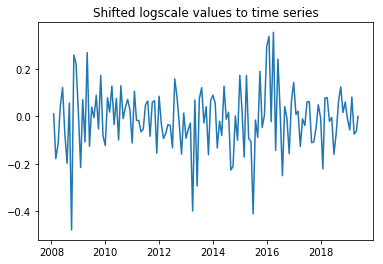

In [269]:
datasetLogDiffShifting = DF_logScale - DF_logScale.shift()
plt.plot(datasetLogDiffShifting)
plt.title("Shifted logscale values to time series")

In [253]:
from statsmodels.tsa.seasonal import seasonal_decompose 

Results of Dickey-Fuller Test:
Test Statistic                -6.455990e+00
p-value                        1.483029e-08
#Lags Used                     6.000000e+00
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64


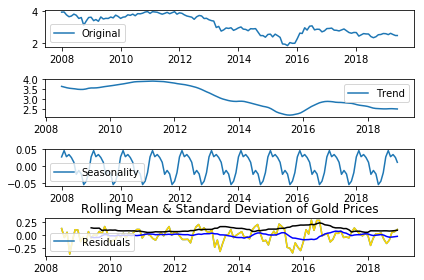

In [263]:
decomposition = seasonal_decompose(DF_logScale, freq = 12)
trend = decomposition.trend 
seasonal = decomposition.seasonal 
residual = decomposition.resid

plt.subplot(411) 
plt.plot(DF_logScale, label = 'Original') 
plt.legend(loc = 'best') 
plt.subplot(412) 
plt.plot(trend, label = 'Trend') 
plt.legend(loc = 'best') 
plt.subplot(413) 
plt.plot(seasonal, label = 'Seasonality') 
plt.legend(loc = 'best') 
plt.subplot(414) 
plt.plot(residual, label = 'Residuals') 
plt.legend(loc = 'best') 
plt.tight_layout()

decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

Results of Dickey-Fuller Test:
Test Statistic                -6.455990e+00
p-value                        1.483029e-08
#Lags Used                     6.000000e+00
Number of Observations Used    1.190000e+02
Critical Value (1%)           -3.486535e+00
Critical Value (5%)           -2.886151e+00
Critical Value (10%)          -2.579896e+00
dtype: float64


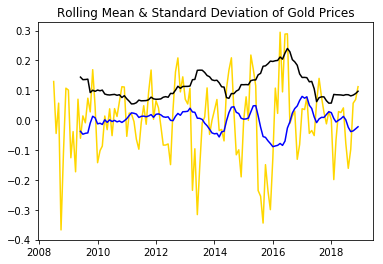

In [264]:
decomposedLogData = residual
decomposedLogData.dropna(inplace=True)
test_stationarity(decomposedLogData)

In [266]:
#ACF & PACF plots
from statsmodels.tsa.stattools import acf, pacf 

In [271]:
# remove NaN values
datasetLogDiffShifting.dropna(inplace = True)
datasetLogDiffShifting.head(10)


,Price
Date,
2008-02-01,0.009866
2008-03-01,-0.178671
2008-04-01,-0.117841
2008-05-01,0.042333
2008-06-01,0.121609
2008-07-01,-0.071744
2008-08-01,-0.198365
2008-09-01,0.056262
2008-10-01,-0.479741


Text(0.5, 1.0, 'Partial Autocorrelation Function')

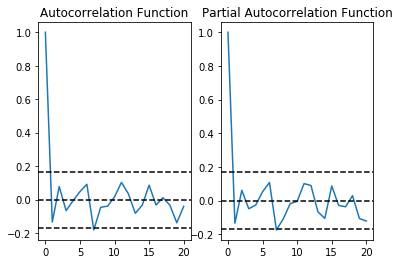

In [275]:

lag_acf = acf(datasetLogDiffShifting, nlags = 20)
lag_pacf = pacf(datasetLogDiffShifting, nlags = 20, method = 'ols')

#plot ACF
plt.subplot(121)
plt.plot(lag_acf)
plt.axhline(y=0, linestyle='--', color = 'black')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color = 'black')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color = 'black')
plt.title("Autocorrelation Function")

#plot PACF
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0, linestyle='--', color = 'black')
plt.axhline(y=-1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color = 'black')
plt.axhline(y=1.96/np.sqrt(len(datasetLogDiffShifting)), linestyle='--', color = 'black')
plt.title("Partial Autocorrelation Function")

C:\Users\Sarit\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Sarit\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting AR Model


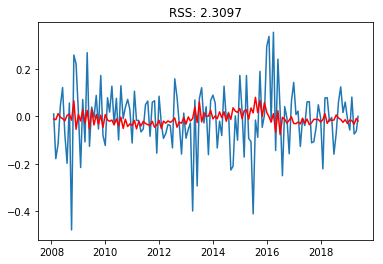

In [294]:
from statsmodels.tsa.arima_model import ARIMA

# AR model
model = ARIMA(DF_logScale, order = (2, 1, 2))
results_AR = model.fit(disp = -1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_AR.fittedvalues, color = 'red')
plt.title("RSS: %.4f" % sum((results_AR.fittedvalues - datasetLogDiffShifting['Price'])**2))
print('Plotting AR Model')

Plotting MA Model


C:\Users\Sarit\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Sarit\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


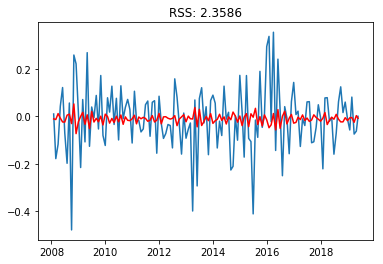

In [299]:
#MA model
model= ARIMA(DF_logScale, order = (2, 1, 0))
results_MA = model.fit(disp = -1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_MA.fittedvalues, color = 'red')
plt.title("RSS: %.4f" % sum((results_MA.fittedvalues - datasetLogDiffShifting['Price'])**2))
print('Plotting MA Model')

C:\Users\Sarit\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)
C:\Users\Sarit\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:225: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  ' ignored when e.g. forecasting.', ValueWarning)


Plotting ARIMA Model


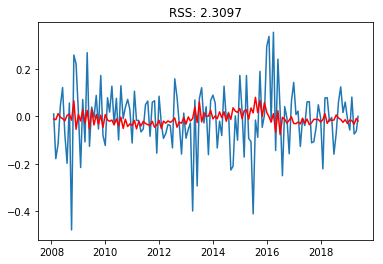

In [300]:
model= ARIMA(DF_logScale, order = (2, 1, 2))
results_ARIMA = model.fit(disp = -1)
plt.plot(datasetLogDiffShifting)
plt.plot(results_ARIMA.fittedvalues, color = 'red')
plt.title("RSS: %.4f" % sum((results_ARIMA.fittedvalues - datasetLogDiffShifting['Price'])**2))
print('Plotting ARIMA Model')

In [307]:
predictions_ARIMA_diff = pd.Series(results_ARIMA.fittedvalues, copy = True)
print(predictions_ARIMA_diff.head())

Date
2008-02-01   -0.011241
2008-03-01   -0.014111
2008-04-01    0.011459
2008-05-01   -0.003788
2008-06-01   -0.009482
dtype: float64


In [308]:
#convert to cumulative sum
predictions_ARIMA_diff_cumsum = predictions_ARIMA_diff.cumsum()
print(predictions_ARIMA_diff_cumsum.head())

Date
2008-02-01   -0.011241
2008-03-01   -0.025352
2008-04-01   -0.013894
2008-05-01   -0.017681
2008-06-01   -0.027163
dtype: float64


In [310]:
predictions_ARIMA_log = pd.Series(DF_logScale['Price'].ix[0], index = DF_logScale.index)
predictions_ARIMA_log = predictions_ARIMA_log.add(predictions_ARIMA_diff_cumsum, fill_value=0)
predictions_ARIMA_log.head()

C:\Users\Sarit\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#ix-indexer-is-deprecated
  """Entry point for launching an IPython kernel.


Date
2008-01-01    3.940416
2008-02-01    3.929175
2008-03-01    3.915064
2008-04-01    3.926522
2008-05-01    3.922735
dtype: float64

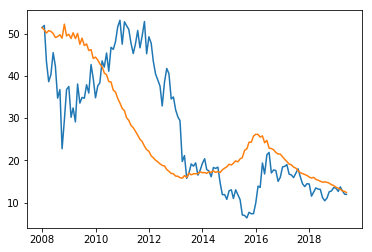

In [311]:
predictions_ARIMA = np.exp(predictions_ARIMA_log)
plt.plot(DF)
plt.plot(predictions_ARIMA)

In [316]:
DF_logScale

,Price
Date,
2008-01-01,3.940416
2008-02-01,3.950282
2008-03-01,3.771611
2008-04-01,3.653770
2008-05-01,3.696103
2008-06-01,3.817712
2008-07-01,3.745968
2008-08-01,3.547604
2008-09-01,3.603866


C:\Users\Sarit\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\Sarit\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)
C:\Users\Sarit\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:531: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  ValueWarning)


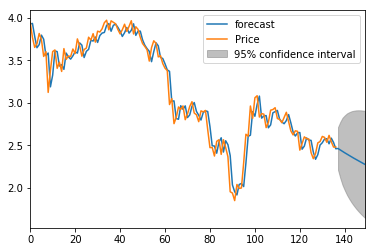

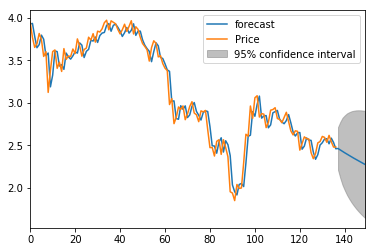

In [313]:
results_ARIMA.plot_predict(1,150)
#results_ARIMA.forecast(steps=12)

In [314]:
# results_ARIMA.plot_predict(1150)
results_ARIMA.forecast(steps=12)

(array([2.4634479 , 2.44606158, 2.42937502, 2.41276998, 2.39665904,
        2.38071067, 2.36513394, 2.34974841, 2.33465734, 2.31976027,
        2.3051057 , 2.29063577]),
 array([0.12900624, 0.1689151 , 0.20238019, 0.22503477, 0.24513921,
        0.26048021, 0.27408738, 0.28509424, 0.29481369, 0.30293878,
        0.31009292, 0.31619258]),
 array([[2.21060032, 2.71629549],
        [2.11499408, 2.77712909],
        [2.03271714, 2.8260329 ],
        [1.97170993, 2.85383003],
        [1.91619502, 2.87712307],
        [1.87017884, 2.89124251],
        [1.82793255, 2.90233533],
        [1.79097396, 2.90852286],
        [1.75683314, 2.91248155],
        [1.72601116, 2.91350937],
        [1.69733475, 2.91287665],
        [1.67090969, 2.91036184]]))